# Procesiranje signalov
    Predmet: Dinamika strojev
    Avtor: Andrej Nabergoj
    Asistent: prof. dr. Janko Slavič

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [2]:
T_zajema = 1.
t = np.linspace(0, T_zajema, 300)
faza = 2.3
zac_vrednost = 0
frekvenca = 1
A = 1
x = A*np.cos(2*np.pi*frekvenca*t + faza) + zac_vrednost

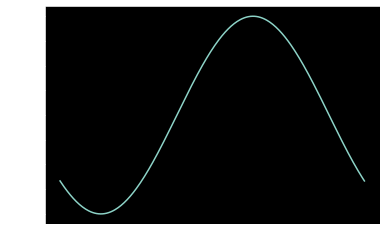

In [3]:
plt.plot(t, x);

### Fourierjeve vrste

\begin{equation}
x(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}\left[a_n\cos(\frac{2\pi n t}{T_p}) + b_n\sin(\frac{2\pi n t}{T_p})\right]
\end{equation}

\begin{equation}
a_0 = \frac{2}{T_p} \int_0^{T_p} x(t) dt
\end{equation}

\begin{equation}
a_n = \frac{2}{T_p} \int_0^{T_p} x(t)\cos(\frac{2\pi n t}{T_p}) dt
\end{equation}

\begin{equation}
b_n = \frac{2}{T_p} \int_0^{T_p} x(t)\sin(\frac{2\pi n t}{T_p}) dt
\end{equation}

Izračunamo lahko samo koeficiente frekvenc, da velja niquistov kriterij $f<f_{vzorčenja}/2$  
Koliko jih je pri `np.fft.fft()`?

In [4]:
def par(t, x, n, func):
    dt = t[1] - t[0]
    Tp = t[-1] - t[0] # Vzames celoten čas zajema kot periodo
    product = x*func(2*np.pi*n/Tp*t)
    return 2/Tp*np.trapz(product, dx=dt)

def an(t, x, n):
    return par(t, x, n, np.cos)

def bn(t, x, n):
    return par(t, x, n, np.sin)

In [5]:
def x_reconstr(t, x, N):
    Tp = t[-1] - t[0]
    x_rec = np.zeros(len(t))
    for n in range(N+1):
        if n==0:
            x_rec += [an(t, x, 0)/2 for i in range(len(t))]
        else:
            x_rec += an(t, x, n)*np.cos(2*np.pi*n/Tp*t) + bn(t, x, n)*np.sin(2*np.pi*n/Tp*t)
    return x_rec

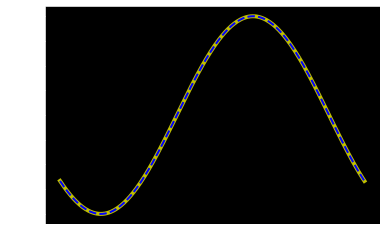

In [6]:
plt.plot(t, x, 'y', linewidth=4);
plt.plot(t, x_reconstr(t, x, 10), 'b--', linewidth=2);

In [7]:
def Xan(t, x, N):
    ''' return ampl, phase, freq'''
    ampl = []
    phase = []
    for n in range(N+1):
        Tp = t[-1] - t[0]
        _an = an(t, x, n)
        _bn = bn(t, x, n)
        ampl.append(np.sqrt(_an**2 + _bn**2))
        phase.append(np.arctan2(-_bn,_an))
        freq = [n/Tp for n in range(N+1)]
    return ampl, phase, freq

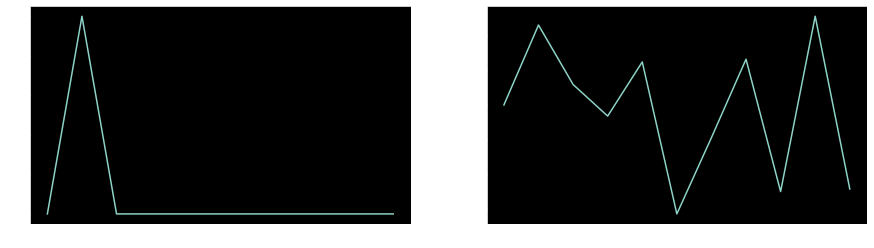

In [8]:
N = 10
ampl, phase, freq = Xan(t, x, N)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(freq, ampl);
plt.subplot(122)
plt.plot(freq, phase);

### Kompleksne fourierjeve vrste

\begin{equation}
x(t) = \sum_{n=-\infty}^{\infty} c_n e^{j 2\pi n\frac{t}{T_p}}
\end{equation}

\begin{equation}
c_n = \frac{1}{T_p} \int_{-T_p/2}^{T_p/2} x(t) e^{-j 2\pi n\frac{t}{T_p}} dt
\end{equation}

In [9]:
def cn(t, x, n):
    '''return cn coef'''
    Tp = t[-1] - t[0]
    dt = t[1] - t[0]
    product = x*np.exp(-1j*2*np.pi*n/Tp*t)
    return 1/Tp*np.trapz(product, dx=dt)

In [10]:
def x_reconstr(t, x, N):
    Tp = t[-1] - t[0]
    x_rec = np.zeros(len(t), dtype='complex')
    for n in range(-N, N+1):
        x_rec += cn(t, x, n)*np.exp(1j*2*np.pi*n/Tp*t)
    return np.real(x_rec)

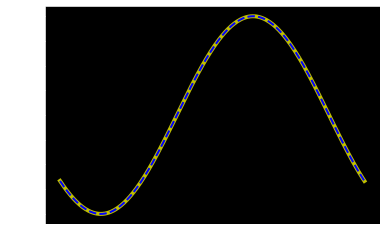

In [11]:
plt.plot(t, x, 'y', linewidth=4);
plt.plot(t, x_reconstr(t, x, 10), 'b--', linewidth=2);

Fazo dobim kot bi upošteval funkcijo cos.

In [12]:
def Xcn(t, x, N):
    ''' return ampl, phase, freq'''
    ampl = []
    phase = []
    for n in range(-N, N+1):
        Tp = t[-1] - t[0]
        _cn = cn(t, x, n)
        ampl.append(np.abs(2*_cn))
        phase.append(np.angle(_cn))
        freq = [n/Tp for n in range(-N, N+1)]
    return ampl[N:], phase[N:], freq[N:]

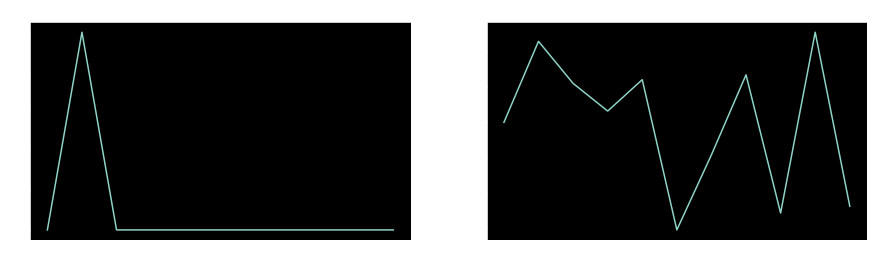

In [13]:
N = 10
ampl, phase, freq = Xcn(t, x, N)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(freq, ampl);
plt.subplot(122)
plt.plot(freq, phase);
plt.text(N-5, 3, '$\phi=${}'.format(np.angle(cn(t, x, 1))));

In [14]:
def Xnp(t, x, N):
    ampl = np.abs(np.fft.fft(x)[:N])
    phase = np.angle(np.fft.fft(x)[:N])
    freq = np.fft.fftfreq(len(t), t[1]-t[0])[:N]
    return ampl, phase, freq

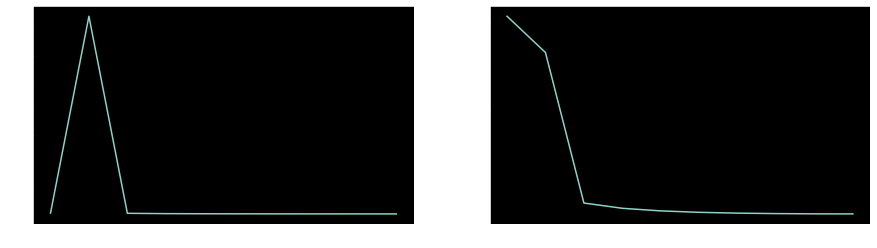

In [15]:
N = 10
ampl, phase, freq = Xnp(t, x, N)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(freq, ampl);
plt.subplot(122)
plt.plot(freq, phase);

In [16]:
def Xdft(t, x, n):
    '''return '''
    Tp = t[-1] - t[0]
    dt = t[1] - t[0]
    X = []
    freq = np.arange(0, n, 1)
    for f in freq:
        product = x*np.exp(-1j*2*np.pi*f*t)
        X.append(np.trapz(product, dx=dt))
    ampl = np.abs(X)
    phase = np.angle(X)
    return ampl, phase, freq

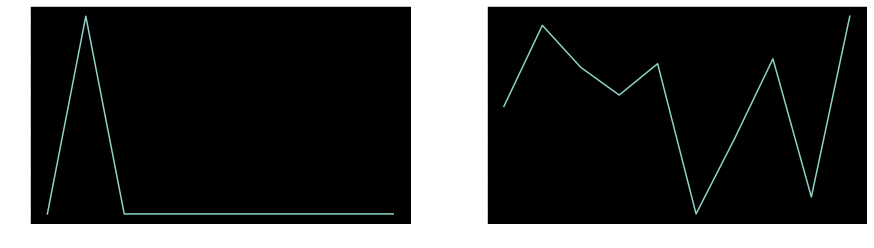

In [17]:
N = 10
ampl, phase, freq = Xdft(t, x, N)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(freq, ampl);
plt.subplot(122)
plt.plot(freq, phase);

In [18]:
def Xnut(t, x, n):
    '''return '''
    Tp = t[-1] - t[0]
    dt = t[1] - t[0]
    X = []
    krange = np.arange(0, n)
    for k in krange:
        np.sum([x[i]*np.exp(-1j*2*np.pi*k*i/len(t)) for i in range(len(t))])
        X.append(np.sum(product, dx=dt))
    ampl = np.abs(X)
    phase = np.angle(X)
    return ampl, phase, freq

In [19]:
timeit(Xdft(t, x, N))

640 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
timeit(Xan(t, x, N))

911 µs ± 8.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
timeit(Xcn(t, x, N))

1.85 ms ± 79.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
timeit(Xnp(t, x, N))

69 µs ± 4.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### DN 1: Pravokotna udarna motnja

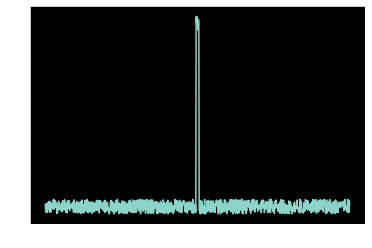

In [23]:
T = 1.
N = 1000
w = 0.01
t = np.linspace(0, T, N)-T/2
x = np.zeros(N)
x[t<=0.5*w*T] = 1.
x[t<-0.5*w*T] = 0.
x = x + 0.04*(np.random.rand(N)-0.5)*2
plt.plot(t, x);

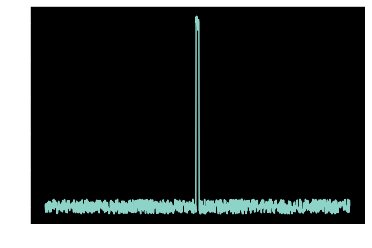

In [24]:
plt.plot(t, x_reconstr(t, x, 500));

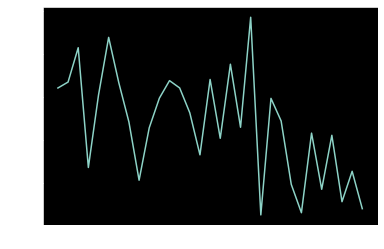

In [25]:
N = 30
ampl, phase, freq = Xan(t, x, N)
plt.plot(freq, ampl)

Naštudiraj kakšne so prave amplitude, tisti koeficienti spredaj.

### DN 2: Polsinusna udarna motnja

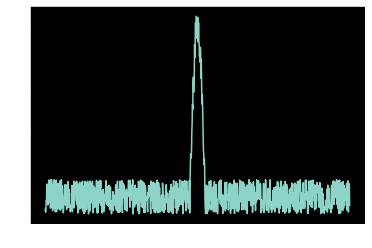

In [26]:
T = 1.
N = 1000
w = 0.05
t = np.linspace(0, T, N)-T/2
x = np.cos(2*np.pi*t/(w*2*T))
x[t> 0.5*w*T] = 0.
x[t<-0.5*w*T] = 0.
x = x + 0.05*(np.random.rand(N)-0.5)*4
plt.plot(t, x);

#### Odvajanje

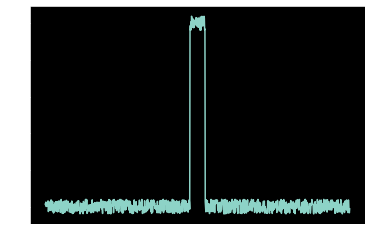

In [27]:
T = 1.
N = 1000
w = 0.05
t = np.linspace(0, T, N)-T/2
x = np.zeros(N)
x[t<=0.5*w*T] = 1.
x[t<-0.5*w*T] = 0.
x = x + 0.04*(np.random.rand(N)-0.5)*2
plt.plot(t, x);

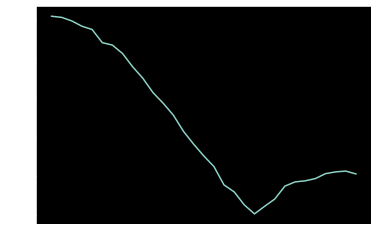

In [28]:
# Fourierova transformacija
N = 30
ampl, phase, freq = Xcn(t, x, N)
plt.plot(freq, ampl);

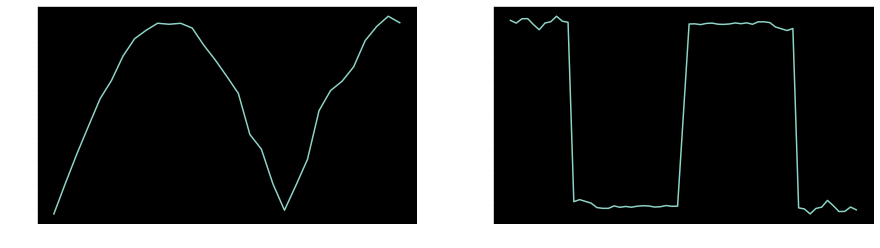

In [29]:
# Odvod
N = 30
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(np.arange(0, N+1), [np.abs(1j*2*np.pi*i*cn(t, x, i)) for i in range(0, N+1)]);
plt.subplot(122)
plt.plot(np.arange(-N, N+1), [np.angle(1j*2*np.pi*i*cn(t, x, i)) for i in range(-N, N+1)]);

In [30]:
# Odvod funkcije s pomočjo fourierove transformacije
def xdot_reconstr(t, x, N):
    Tp = t[-1] - t[0]
    x_rec = np.zeros(len(t), dtype='complex')
    for n in range(-N, N+1):
        x_rec += 1j*2*np.pi*n*cn(t, x, n)*np.exp(1j*2*np.pi*n/Tp*t)
    return x_rec

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


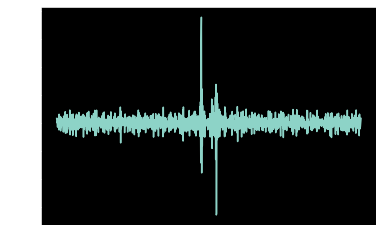

In [31]:
plt.plot(t, xdot_reconstr(t, x, 500));

### DN 3: Windowing

In [32]:
w = 1
N = 51
t = np.linspace(0, 1, N)
w_hann = 0.5*(1 - np.cos(2*np.pi*t/1))

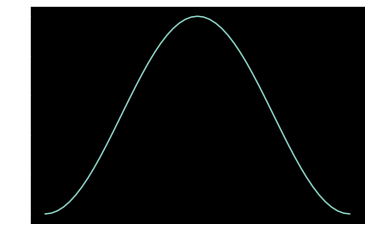

In [33]:
plt.plot(t, w_hann)

(0, 5)

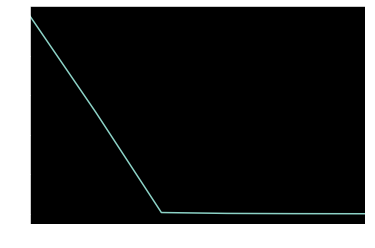

In [34]:
dt = t[1] - t[0]
ampl = np.abs(np.fft.rfft(w_hann))/50
freq = np.fft.rfftfreq(len(w_hann), dt)
plt.plot(freq, ampl);
plt.xlim(0, 5)

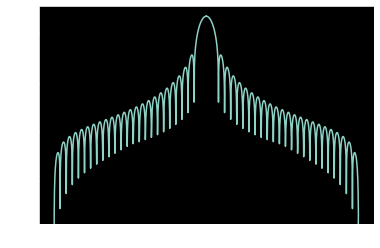

In [35]:
# uporabljen zero padding
N = 2048
dt = t[1] - t[0]
ampl = np.abs(np.fft.fft(w_hann, N))/50
freq = np.fft.fftfreq(N, dt)
plt.semilogy(freq, ampl);

Močnostni spekter
`X/np.sqrt(len(X2)`

- Spectral leakage

## Seminar
#### Discrete random sampling

Additive random sampling

In [36]:
T_zajema = 8.
fs = 5 #average sampling frequency
δ = 0.08 #time quantization

$\tau_n$ interval naključne porazdelitve mora biti $[0.5T_s; 1.5T_s]$

In [62]:
# Time quantization by ADC
def quantize(values, delta):
    '''values: num or np.array()
    delta: quantization step'''
    rounded_val = (values//delta + np.round(values/delta-values//delta))*delta
    return rounded_val

def ars_time(fs, N, δ):
    '''return np.array() of time instants by ARS'''
    τn = 1/fs*(np.random.rand(N-1) + 0.5)
    ti = 0
    t_sampled = [ti]
    for i in np.arange(N-1):
        ti += τn[i]
        t_sampled.append(ti)
    t_sampled = quantize(np.array(t_sampled), δ)
    return np.array(t_sampled)

def jrs_time(fs, N, δ):
    '''return np.array() of time instants by JRS'''
    un = 1/fs*(np.random.rand(N) - 0.5) #random jitter
    T_zajema = N*1/fs
    t_sampled = np.linspace(0, T_zajema, N) + un
    t_sampled = quantize(np.array(t_sampled), δ)
    return np.array(t_samples)

N = int(np.round(fs*T_zajema))
tars = ars_time(fs, N, δ)
tjrs = ars_time(fs, N, δ)
t, dt = np.linspace(0, T_zajema, N, retstep=True)

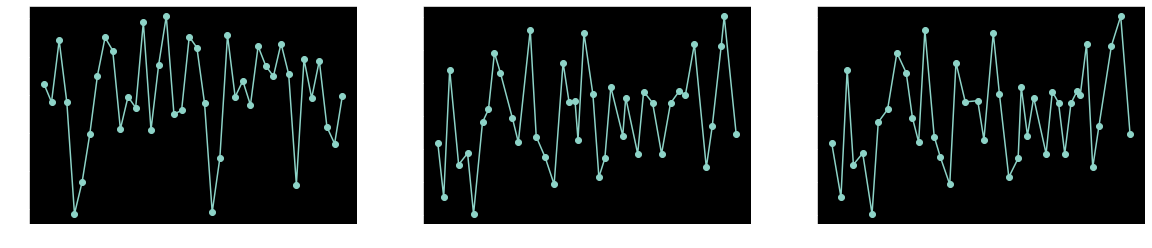

In [66]:
faza = 2.3
zac_vrednost = 0
frekvenca = 4
A = 1
wn = np.random.normal(0, np.sqrt(1), len(t))
x = A*np.cos(2*np.pi*frekvenca*t + faza) + zac_vrednost + wn
wn = np.random.normal(0, np.sqrt(1), len(t))
xars = A*np.cos(2*np.pi*frekvenca*tars + faza) + zac_vrednost + wn
wn = np.random.normal(0, np.sqrt(1), len(t))
xjrs = A*np.cos(2*np.pi*frekvenca*tjrs + faza) + zac_vrednost + wn

plt.figure(figsize=(20,4))
plt.subplot(131)
plt.plot(t, x, '-o');
plt.subplot(132)
plt.plot(tars, xjrs, '-o');
plt.subplot(133)
plt.plot(tjrs, xjrs, '-o');

In [67]:
ampl, phase, freq = Xan(t, x, N)
ampl_ars, phase_ars, freq_ars = Xan(tars, xars, N)
ampl_jrs, phase_jrs, freq_jrs = Xan(tjrs, xjrs, N)

In [57]:
ampl_ars = np.zeros(len(freq_ars))
freq_ars = np.zeros(len(freq_ars))
ampl_jrs = np.zeros(len(freq_ars))
freq_jrs = np.zeros(len(freq_ars))

In [58]:
NN = 100
for i in range(NN):
    N = int(np.round(fs*T_zajema))
    tars = ars_time(fs, N, δ)
    tjrs = ars_time(fs, N, δ)
    t, dt = np.linspace(0, T_zajema, N, retstep=True)
    faza = 2.3
    zac_vrednost = 0
    frekvenca = 4
    A = 1
    x = A*np.cos(2*np.pi*frekvenca*t + faza) + zac_vrednost
    xars = A*np.cos(2*np.pi*frekvenca*tars + faza) + zac_vrednost
    xjrs = A*np.cos(2*np.pi*frekvenca*tjrs + faza) + zac_vrednost
    ampl, phase, freq = Xan(t, x, N)
    ampl_ars1, phase_ars1, freq_ars1 = Xan(tars, xars, N)
    ampl_jrs1, phase_jrs1, freq_jrs1 = Xan(tjrs, xjrs, N)
    ampl_ars += np.array(ampl_ars1)/NN
    freq_ars += np.array(freq_ars1)/NN
    ampl_jrs += np.array(ampl_jrs1)/NN
    freq_jrs += np.array(freq_jrs1)/NN

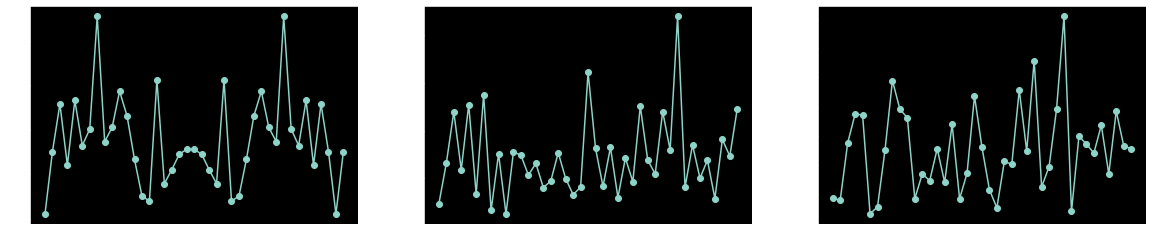

In [68]:
plt.figure(figsize=(20,4))
plt.subplot(131)
plt.plot(freq, ampl, '-o');
plt.subplot(132)
plt.plot(freq_ars, ampl_ars, '-o');
plt.subplot(133)
plt.plot(freq_jrs, ampl_jrs, '-o');

#### Time quantization

- $\delta_{tk}$ ... razdalja med dvema zajemkoma
- $\Delta = \frac{1}{f_s}$ ... najmanjši razmik zajemkov ($f_s$ je frekvenca zajemanja merilne kartice) 

\begin{equation}
\delta_{tk,q} = n\Delta,\ \text{if}\ (n-\frac{1}{2})\Delta < \delta_{tk} \le (n+\frac{1}{2})\Delta
\end{equation}

    - Undersampled
    - Manj porabe energije - prenos podatkov preko wi-fi
    - Aliasing - expand bandwidth
    -
    -The aplication area of the conventional anti-aliasing technique, in the case of periodic sampling based on low-pass prefiltering, is considerably narrower thaan formally follows from the theorem.
    

In [101]:
T_zajema = 0.3
N = 3000
τn = T_zajema/N*2.05*np.random.rand(N-1)

# Quantization of hardware
def quantize(value, delta):
    rounded_val = (value//delta + np.round(value/delta-value//delta))*delta
    return rounded_val
τn = quantize(τn, 0.08)

ti = 0
tnu = [ti]
for i in np.arange(N-1):
    ti += τn[i]
    tnu.append(ti)
tnu = np.array(tnu)
t, dt = np.linspace(0, T_zajema, N, retstep=True)

In [133]:
zeropad = 0
t, dt = np.linspace(0, 0.2, 10000, retstep=True)
wn = (np.random.rand(len(t)) - 0.5)*0

In [134]:
S = 10*np.sin(2*np.pi*1000*t) + 3*np.sin(2*np.pi*1100*t) + 5*np.sin(2*np.pi*1500*t) + 1*np.sin(2*np.pi*1510*t) + wn

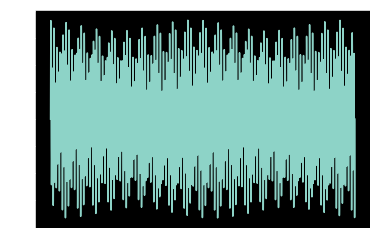

In [135]:
plt.plot(t, S)

In [131]:
X = np.fft.rfft(S, zeropad)
freq = np.fft.rfftfreq(zeropad, dt)

(800, 1600)

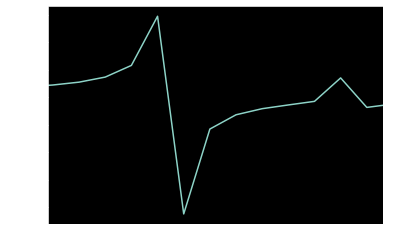

In [132]:
plt.plot(freq, X)
plt.xlim(800, 1600)